In [32]:
import torch 
import math
import numpy as np
from torch import nn
from torch import sigmoid
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

torch.set_default_tensor_type(torch.DoubleTensor)

class ELM(nn.Module):
    def __init__(self, data, labels, neurons):
        super().__init__()
        self.data, self.labels = data, labels        
        
        #create layers
        self.input = nn.Linear(data.shape[1],neurons,dtype=torch.double)        
        self.output = nn.Linear(neurons,labels.shape[1],dtype=torch.double)
        
        #adapt output weights using data and labels
        self.H = sigmoid(self.input(self.data))        
        self.Hp = torch.linalg.pinv(self.H)        
        self.output.weight.data = torch.t(torch.matmul(self.Hp, self.labels))
        
    def forward(self, X):          
        X = self.input(X)
        X = sigmoid(X)
        X = self.output(X)
        X = sigmoid(X)
        return(X)
    
    def loss(self, X, y):        
        f=nn.MSELoss()
        return(f( model.forward(X), y) )
    
    def sequential_learning(self, x, y):
        a  = sigmoid(self.input(x))        
        A  = self.H
        Anew = torch.vstack((A,a))
        Hnew = torch.linalg.pinv(Anew)                
        
        ynew = torch.vstack((self.labels,y))
        self.output.weight.data = torch.t(torch.matmul(Hnew,ynew))

        

Loss-Function


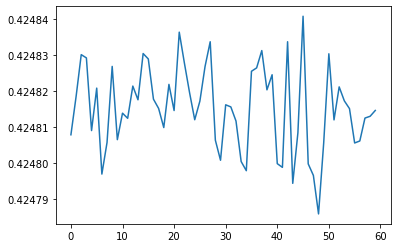

Prediction


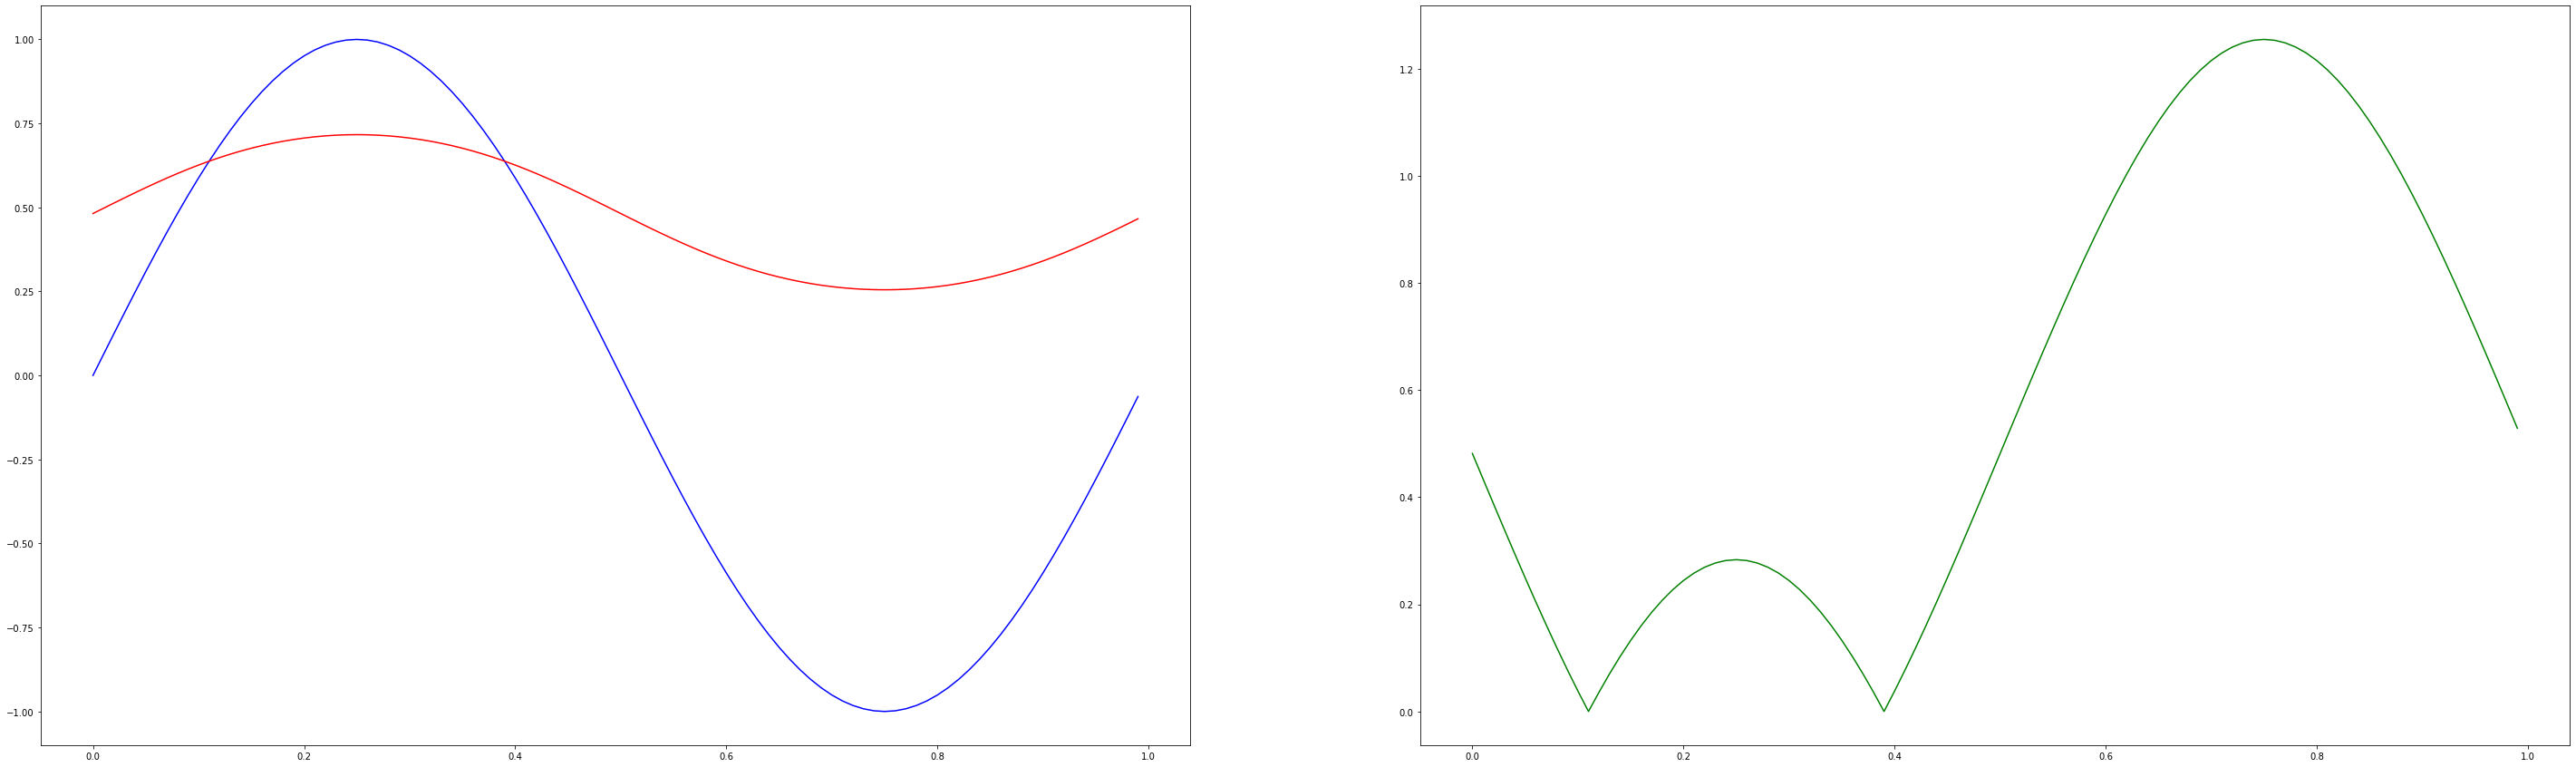

In [45]:
N= 100; freq=2
X = (torch.arange(N)*(1/N)).reshape(N,1)
y = torch.sin(freq * torch.pi * X).reshape((N,1))
#y = X
xtr, xtest, ytr, ytest = train_test_split(X, y, test_size=0.2,shuffle=True)

initN=int(N*0.2)
testN=int(N*0.6)

xtr_init = xtr[:initN]
ytr_init=ytr[:initN]
    
model=ELM(xtr_init,ytr_init,80)

A = model.loss(xtest,ytest)
MSELoss=[]            

#for i in trange(initN+testN, desc="learning"):            
for i in range(testN):            
    xx = xtr[i].reshape((1,1))
    yy = ytr[i].reshape((1,1))
    model.sequential_learning(xx,yy)           
    MSELoss.append(model.loss(xtest,ytest))  
    
B=model.loss(xtest,ytest)


print("Loss-Function")
xaxis=np.linspace(0,len(MSELoss)-1,len(MSELoss))    
plt.plot(xaxis,torch.tensor(MSELoss).detach().numpy())
plt.show()

print("Prediction")
prediction = model.forward(X).detach().numpy()
diff = abs(prediction-y.numpy())
figure,axis=plt.subplots(1,2)
figure.set_figwidth(50)
figure.set_figheight(15)    
axis[0].plot(X.numpy(), y.numpy() ,color="blue")
axis[0].plot(X.numpy(), prediction ,color="red")
axis[1].plot(X.numpy(), diff ,color="green")
plt.show()


In [36]:
torch.tensor(MSELoss).detach().numpy()

array([0.09965726, 0.09965176, 0.09972321, 0.09968713, 0.09974121,
       0.09969017, 0.09971092, 0.09966312, 0.09971113, 0.09969948,
       0.09973381, 0.09974009, 0.0997004 , 0.09974597, 0.09971392,
       0.09968197, 0.09969158, 0.09970009, 0.09971163, 0.09969772,
       0.09966394, 0.09969497, 0.09967428, 0.09964941, 0.09965939,
       0.09969633, 0.09964927, 0.09971172, 0.09972207, 0.09966627,
       0.09968733, 0.09970058, 0.09968783, 0.09970472, 0.09970893,
       0.09970938, 0.09968842, 0.09966646, 0.09968014, 0.09969749,
       0.09967099, 0.0996973 , 0.09966282, 0.09968855, 0.09970285,
       0.09971803, 0.09971723, 0.09970307, 0.09971793, 0.09972543,
       0.09972763, 0.09968053, 0.09968483, 0.09965909, 0.09968714,
       0.0996807 , 0.0996656 , 0.09969116, 0.09971501, 0.0997039 ])

In [30]:
X=torch.tensor([[1.0]])
y=torch.tensor([[1.0]])

a1=torch.tensor([[0.5]])
b1=torch.tensor([[0.25]])

a2=torch.tensor([[0.4]])
b2=torch.tensor([[0.16]])

a3=torch.tensor([[2.0]])
b3=torch.tensor([[4.0]])

model=ELM(X,y,2)
print(model.output.weight.data)
print(model.loss(X,y))
print(model.loss(a1,b1))
print(model.loss(a2,b2))
print(model.loss(a3,b3))
print("erstes lernen")
for h in range(60):
    model.sequential_learning(a1,b1)
    model.sequential_learning(a2,b2)    
    model.sequential_learning(a3,b3)        
print(model.output.weight.data)
print(model.loss(X,y))
print(model.loss(a1,b1))
print(model.loss(a2,b2))
print(model.loss(a3,b3))

tensor([[0.3361, 1.4501]])
tensor(0.1021, grad_fn=<MseLossBackward0>)
tensor(0.1943, grad_fn=<MseLossBackward0>)
tensor(0.2841, grad_fn=<MseLossBackward0>)
tensor(11.1401, grad_fn=<MseLossBackward0>)
erstes lernen
tensor([[-41.8235,  11.2208]])
tensor(0.1021, grad_fn=<MseLossBackward0>)
tensor(0.0102, grad_fn=<MseLossBackward0>)
tensor(0.0051, grad_fn=<MseLossBackward0>)
tensor(9.1376, grad_fn=<MseLossBackward0>)


Parameter containing:
tensor([[-10.6127,   8.3620]], requires_grad=True)

In [10]:
model.loss(X,y)

tensor(9.0726, grad_fn=<MseLossBackward0>)